<a href="https://colab.research.google.com/github/onafridayz/AI_Project/blob/main/01_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B3%80%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 선언

In [1]:
# prompt: 머신러닝 실습을 할건데 기본라이브러리 sklearn 포함해서 선언해줘

import sklearn
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# 데이터 불러오기

In [5]:
dataPath = "https://raw.githubusercontent.com/hyokwan/python-lecture/refs/heads/master/dataset/cars.csv"
featuresDf = pd.read_csv(dataPath)
featuresDf.head(2)


,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792


1. 타입 통합 및 숫자 특성컬럼 추가

In [7]:
print(featuresDf.dtypes)

age       int64
gender    int64
miles     int64
debt      int64
income    int64
sales     int64
dtype: object


In [11]:
### 타입 통합

intColumns = ["age","gender","miles","debt", "income", "sales"]


# int컬럼들에 대해서 모두 int로 변환 -- 현재 모두 int
# for i in range(0, len(intColumns)):
#     eachColumnName = intColumns[i]
#     featuresDf[eachColumnName] = featuresDf[eachColumnName].astype(int)

# featuresDf
featuresDf

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


In [13]:
### 특성 선정
corrDf = featuresDf.corr(numeric_only=True)
stdCorr = 0.5
corrDf

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [32]:

### 특성 선정
corrDf = featuresDf.corr(numeric_only=True)
stdCorr = 0.3
label = ["sales"]
print(f"정답지는 {label}" )
features = list( corrDf.loc[ ( abs( corrDf.sales ) >= stdCorr ) &
                            ( abs( corrDf.sales ) != 1 )].index )
print(f"선정된 features: {features}")

정답지는 ['sales']
선정된 features: ['age', 'miles', 'debt', 'income']


In [72]:
### 데이터 분리
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split( featuresDf, test_size=0.2, random_state=10 )
### 데이터를 문제, 정답지로 분리시켜야한다
trainDataFeatures = trainData.loc[:, features]
trainDataLabel = trainData.loc[:, label]
trainDataAll = trainData.loc[:]
testDataFeatures = testData.loc[:, features]
testDataLabel = testData.loc[:, label]
testDataAll = testData.loc[:]


In [74]:
print( trainDataFeatures.shape )
print( trainDataLabel.shape )
print( trainDataAll.shape )

print( testDataFeatures.shape )
print( testDataLabel.shape )
print( testDataAll.shape )

(770, 4)
(770, 1)
(770, 6)
(193, 4)
(193, 1)
(193, 6)


In [70]:
# 모델 적용
from sklearn import tree, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
### 모델 선언
dtModel = tree.DecisionTreeRegressor(random_state=10, max_depth=10)
rfModel = ensemble.RandomForestRegressor( random_state= 10, n_estimators=20)
lrModel = LinearRegression()
## 모델 훈련
fittedDtModel = dtModel.fit( X=trainDataFeatures, y=trainDataLabel )
fittedRfModel = rfModel.fit( X=trainDataFeatures, y=trainDataLabel )
fittedLrModel = lrModel.fit( X=trainDataFeatures, y=trainDataLabel )



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


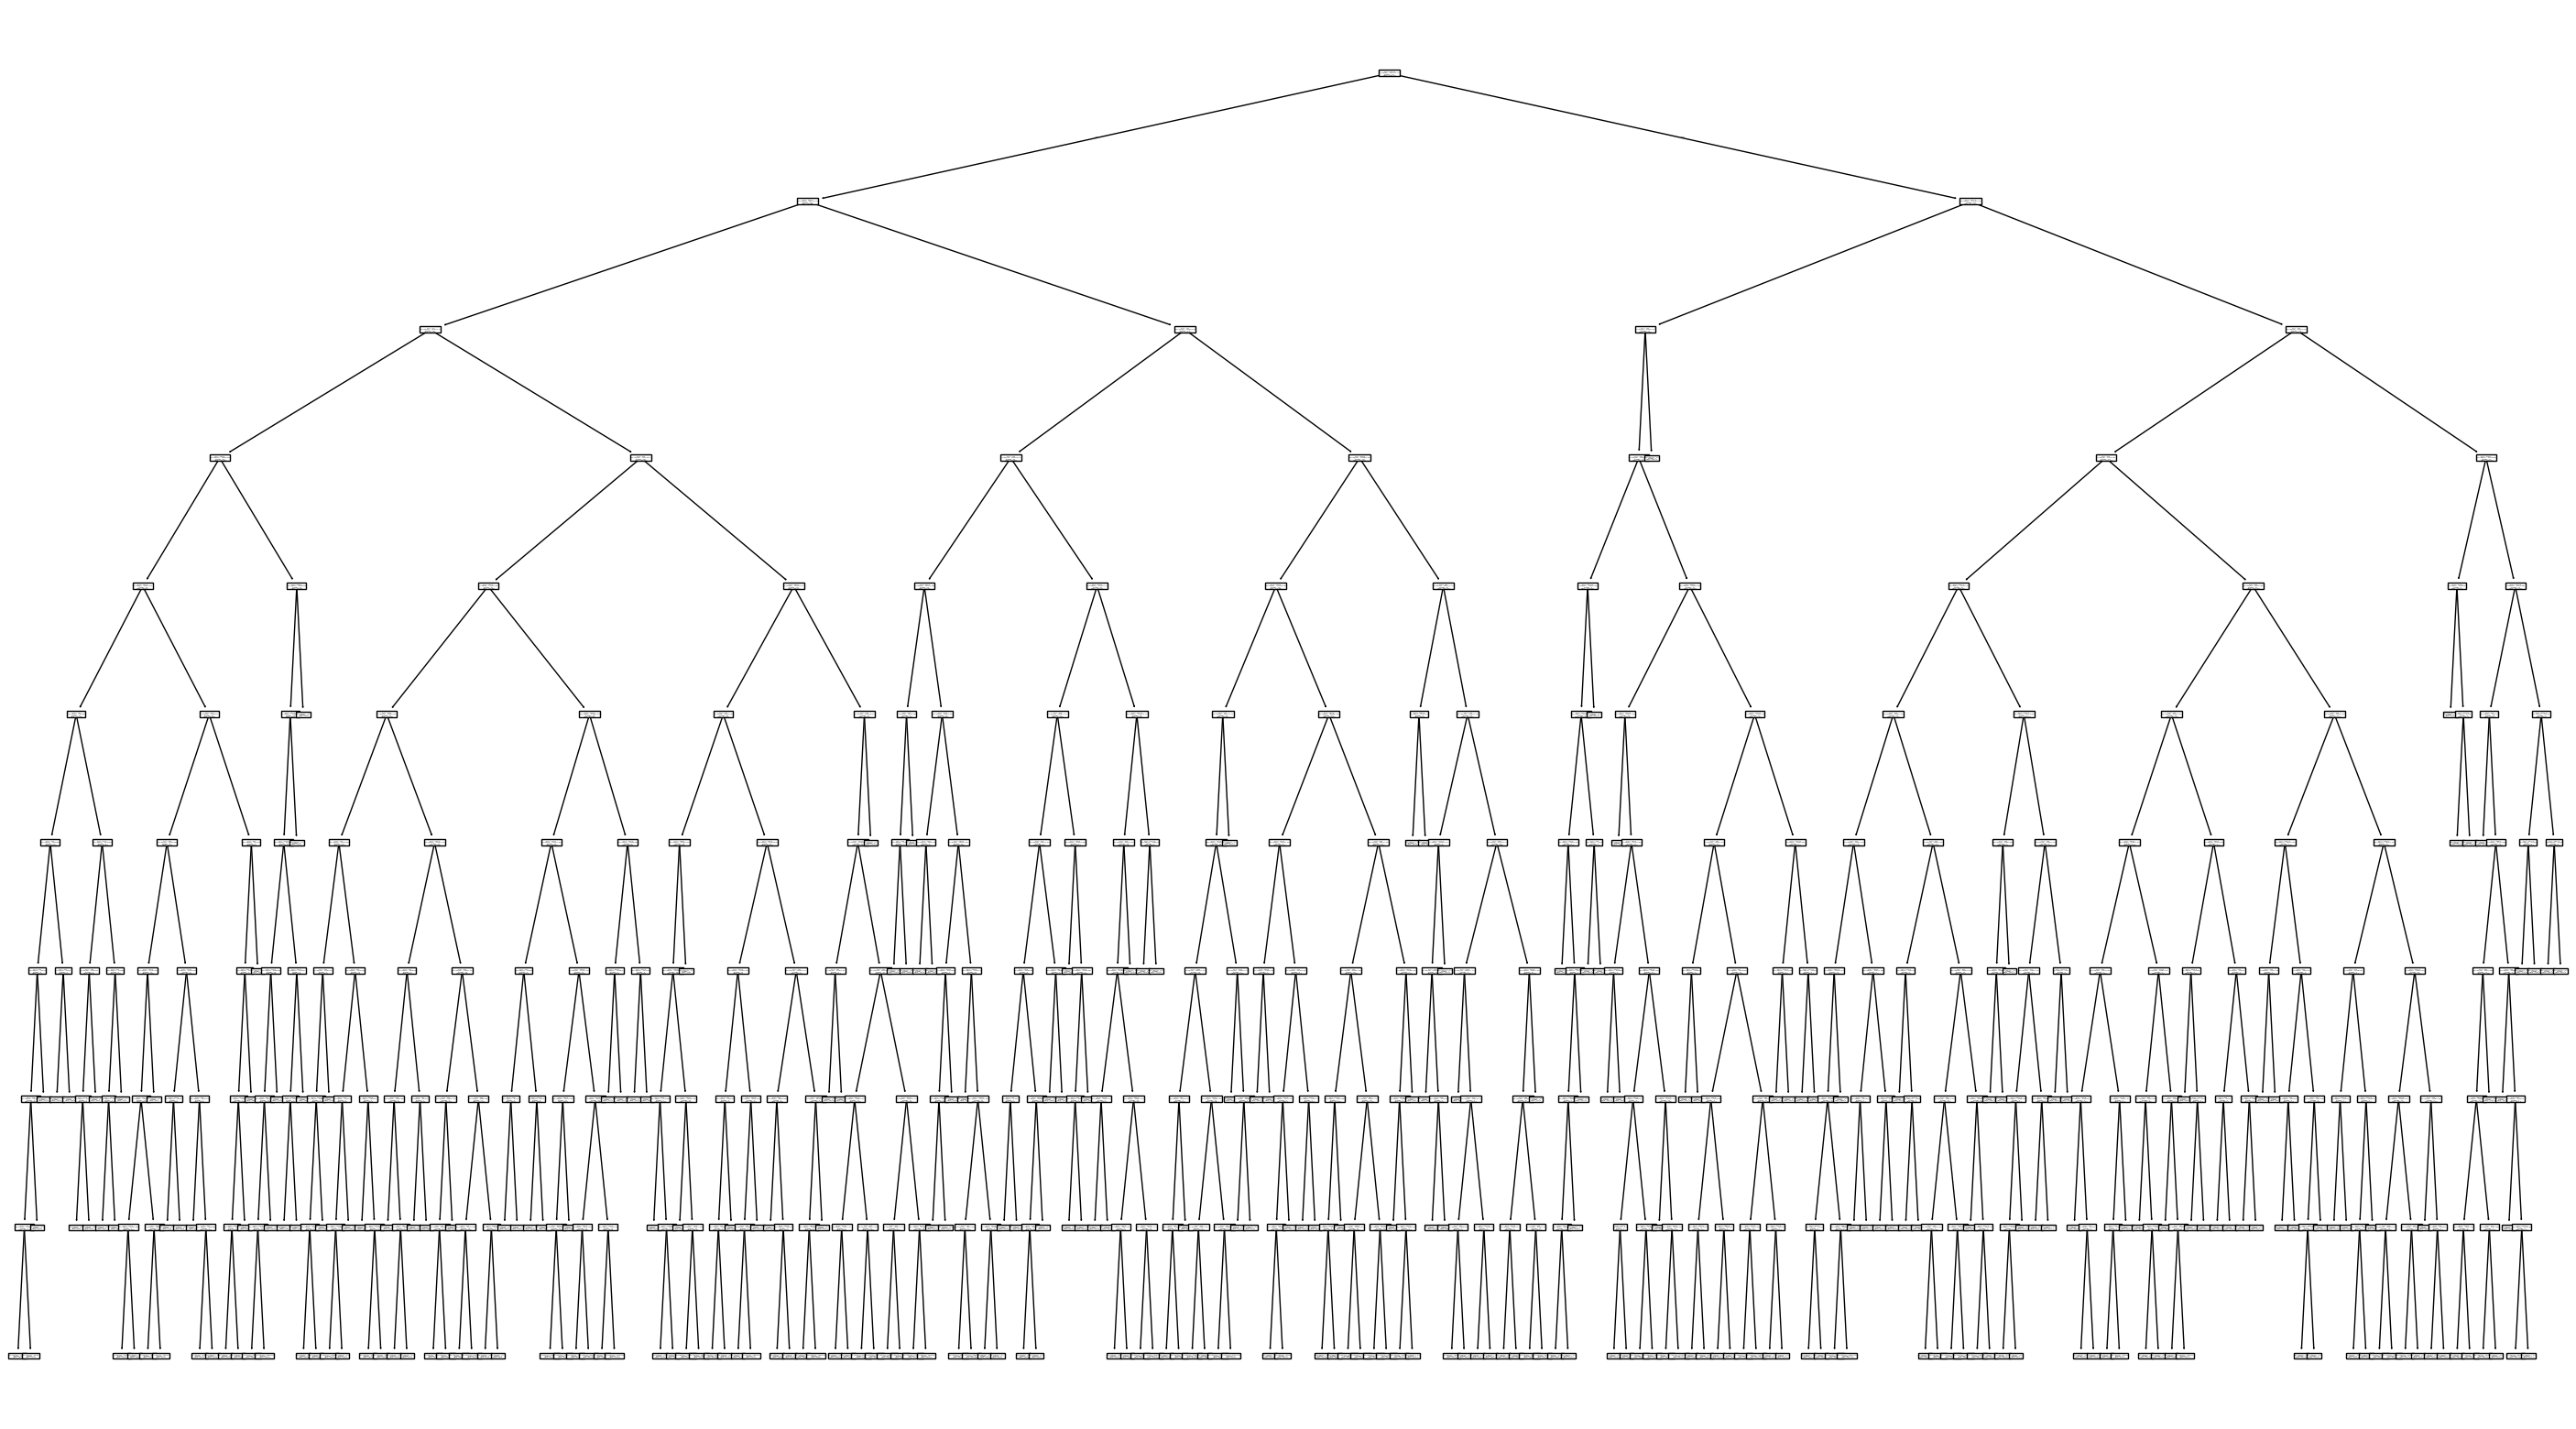

In [71]:
plt.figure(figsize=(36,20))
plot_tree(fittedDtModel)
plt.savefig("./plt_dt.png")

In [66]:
# 예측 / 검증

dtPredictValue = fittedDtModel.predict( X=testDataFeatures )
rfPredictValue = fittedRfModel.predict( X=testDataFeatures )
lrPredictValue = fittedLrModel.predict( X=testDataFeatures )
#dtPredictValue

In [67]:
### 데이터 정리


testDataLabel["DT_PREDICT"] = dtPredictValue
testDataLabel["RF_PREDICT"] = rfPredictValue
testDataLabel["LR_PREDICT"] = lrPredictValue
testDataLabel.head(5)


,sales,DT_PREDICT,RF_PREDICT,LR_PREDICT
456,19247,20142.648649,20985.35,20102.189140
615,12886,8895.276596,7504.65,5053.708239
753,4894,4118.512500,5862.40,4015.013099
943,28119,26172.675000,25773.35,23580.759403
27,5222,4774.090909,6994.70,8128.372313


In [68]:
#정확도 검증
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

maeDtValue = mean_absolute_error(y_true = testDataLabel.sales,
                    y_pred = testDataLabel.DT_PREDICT )
maeRfValue = mean_absolute_error(y_true = testDataLabel.sales,
                    y_pred = testDataLabel.RF_PREDICT )
rmseDt = np.sqrt( mean_squared_error( testDataLabel.sales,
                                      testDataLabel.DT_PREDICT ) )
rmseRf = np.sqrt( mean_squared_error( testDataLabel.sales,
                                      testDataLabel.RF_PREDICT ) )


print(f" maeDtValue: {maeDtValue} maeRfValue; {maeRfValue} ")
print(f" rmseDtValue: {rmseDt} rmaeRfValue; {rmseRf} ")



 maeDtValue: 1926.8201676886379 maeRfValue; 1925.1432642487046 
 rmseDtValue: 2953.190844394314 rmaeRfValue; 2944.1631709342287 


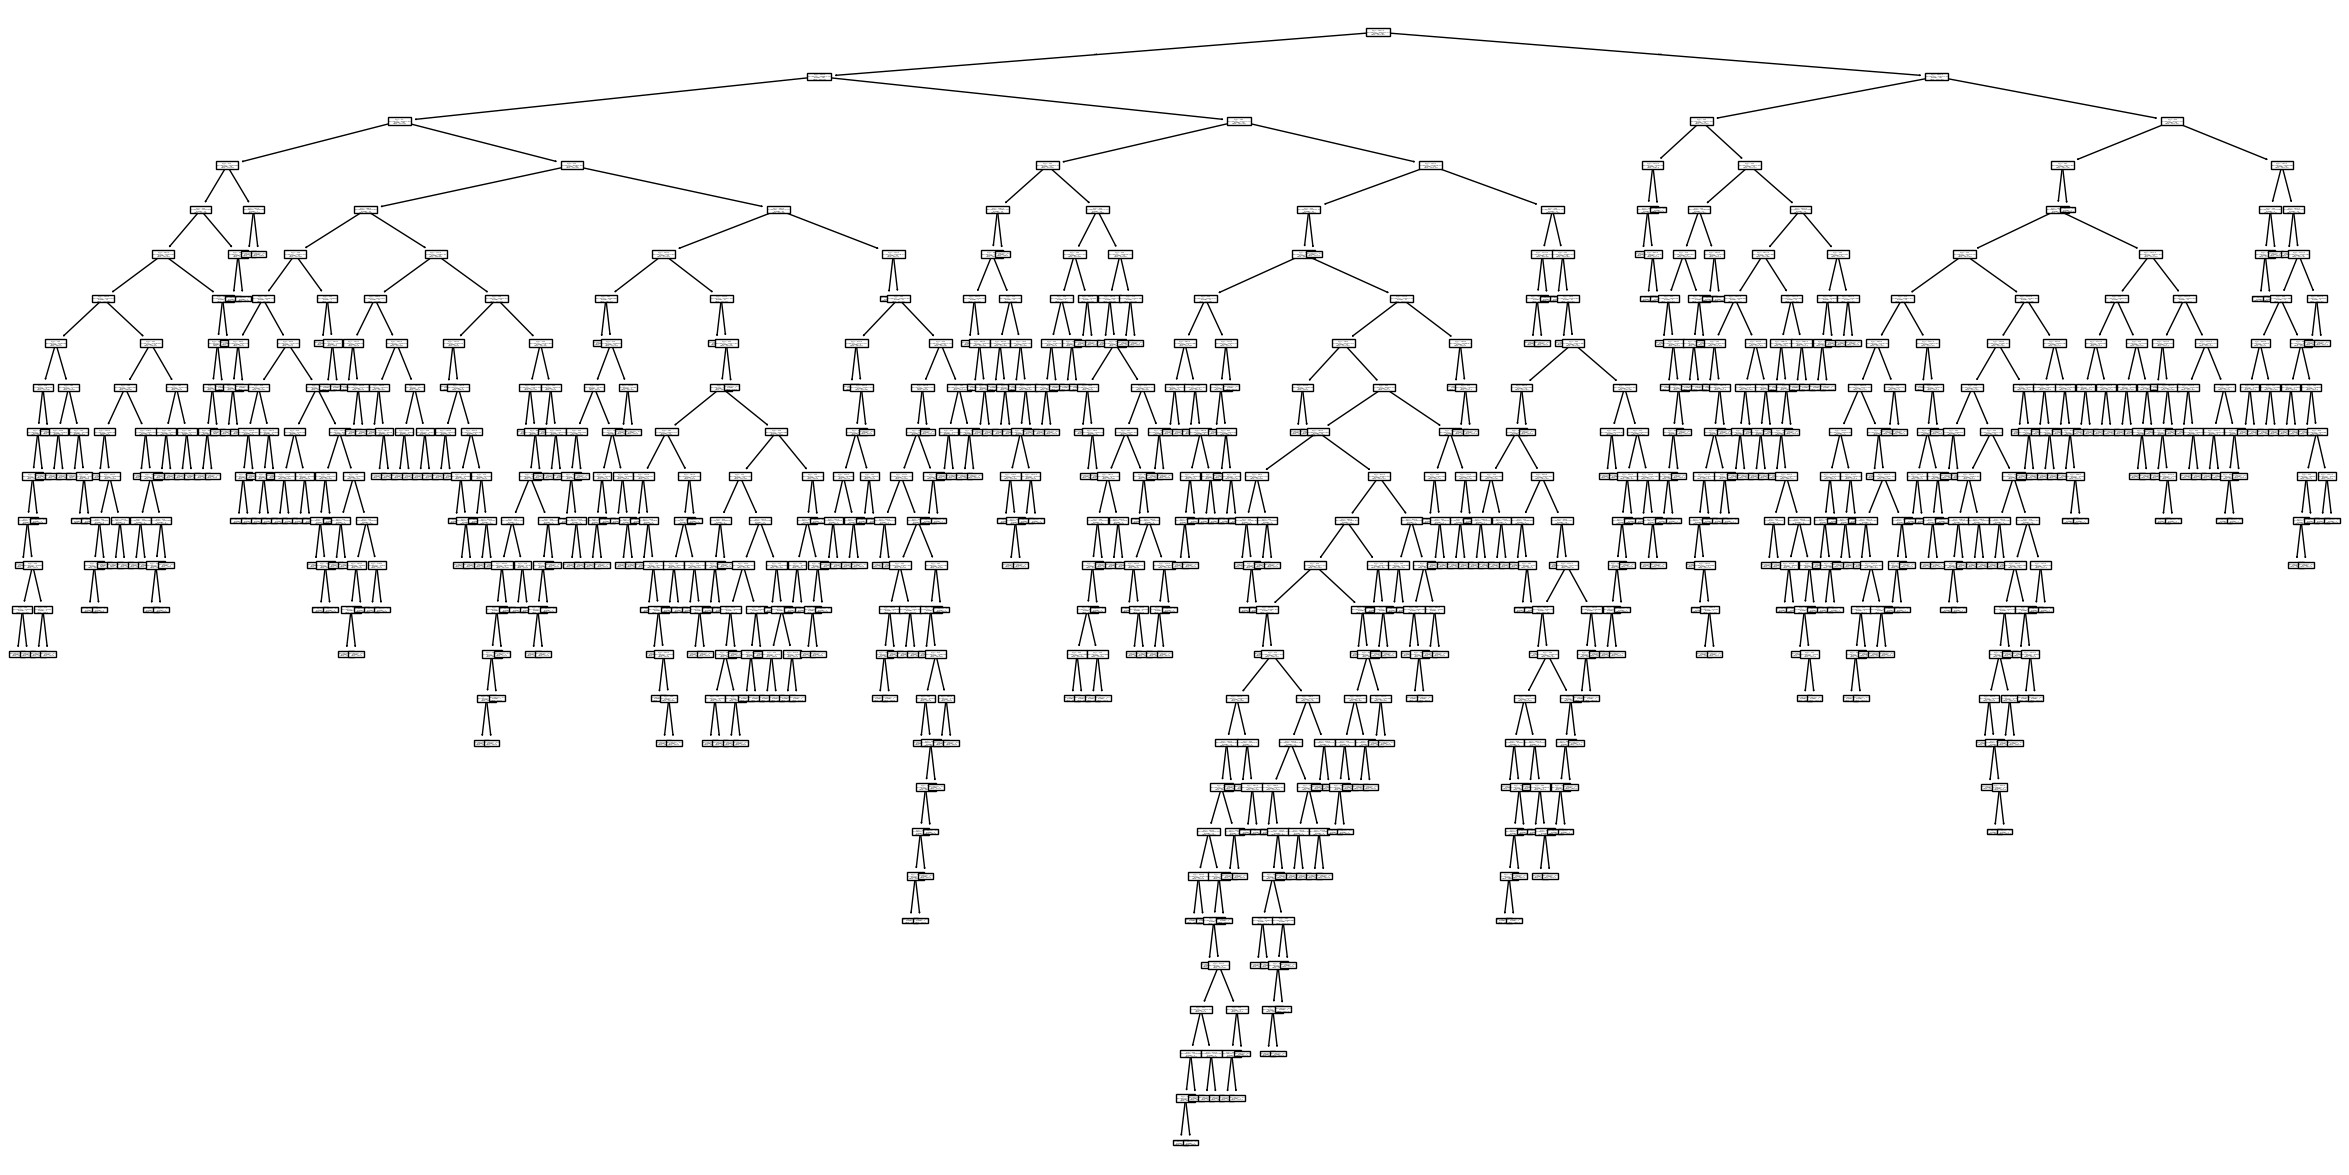

In [77]:
plt.figure(figsize= (30,15))
plot_tree(fittedRfModel.estimators_[0])
plt.savefig("./plt_rf.png")